# Data driven business analytics - Homework 2

## Problem 1. Decision trees

### Implementing the split step 
First, you will implement the split step of the decision tree. To do this we ask you to implement:
- `entropy` - computes the entropy of a random variable
- `mutual information` - computes mutual information between two binary random variables
- `split` - splits the data according to a given threshold
- `best_split` - outputs the best feature and the best threshold to partition the data, based on maximization of the mutual information scores

In [1]:
import numpy as np

In [2]:
def entropy(x):
    """
    Parameters:
        x - 1 dimensional numpy vector
    Return:
        res - float number
    """
    ############################################################################
    # TODO: Computes the entropy.                                              #
    #  Remark: make sure that you use base 2 logarithm,                        #
    #         (you may use np.log2)                                            #
    ############################################################################
    # Replace "..." with your code
    prob = np.sum(x)/len(x)
    res =  - prob * np.log2(prob) - (1-prob) * np.log2(1-prob)

    ############################################################################
    #                               END OF YOUR CODE                           #
    ############################################################################
    
    return res


def mutual_information(x, y):
    """
    Parameters:
        x - 1 dimensional numpy vector of binary values
        y - 1 dimentional numpy vector of binary values
    Return:
        res - float
    """
    ############################################################################
    # TODO: Compute the mutual information between binary data x and y         #
    ############################################################################
    # Replace "..." with your code

    # Compute the entropy of y
    H_y = entropy(y)
    H_y_x = 0

    # Compute the entropy of y given x
    for i in np.unique(x):
        H_y_x += entropy(y[x == i]) * np.sum(x == i) / len(x)

    # Compute the mutual information
    res = H_y - H_y_x

    ############################################################################
    #                               END OF YOUR CODE                           #
    ############################################################################

    return res
    


def split(x_col, threshold):
    """
    Parameters:
        x_col - 1 dimensional numpy vector
        threshold - float
    Return:
        left_ids - 1 dimensional numpy array
        right_ids - 1 dimensional numpy array
    """
    ############################################################################
    # TODO: You should split indices of x_col such that:                       #
    #   - (i)   left_ids contains the indices of x_col that corresponds to     #
    #           the entries of x_col that are smaller or equal than threshold  #
    #   - (ii)  right_ids contains the indices of x_col that corresponds to    #
    #           the entries of x_col that are bigger than threshold            #
    ############################################################################
    # Replace "..." with your code
    
    left_ids = np.where(x_col <= threshold) 
    right_ids = np.where(x_col > threshold) 

    ############################################################################
    #                               END OF YOUR CODE                           #
    ############################################################################

    return left_ids, right_ids

You are now ready to implement the function that performs the split step in the building of the Decision Tree. The method `best_split` should find the value of `threshold` and the feature $X_i$ (where $i$ is the id of the column of $X$) from the set of all features $X=(X_1, X_2, \dots X_m)$ (all columns) that generates the best bipartition of the dataset, based on the comparison of feature $X_i$ to a `threshold` $t$ in terms of maximality of mutual information. 

In other words, you need to find a feature $X_i$ and a threshold $t$ which maximize the mutual information $I(Y\, ; \,X'_i)$, where $X'_i=1$ if $X_i<=t$ and $X'_i=0$ otherwise.

Note that $Y$ is always considered binary in our applications.

In [3]:
def best_split(x, y):
    """
    Parameters:
        x - numpy vector of the shape (n, m)
        y - numpy vector of the shape (n,)
    Return:
        split_id - int
        split_threshold - float
        best_score - float
    """
    ############################################################################
    # TODO: Find the index of the feature (column index of x) and its          #
    #   corresponding threshold that generates the best split with respect to  #
    #   the mutual information metrics.                                        #
    #   - (i)   you should iterate through all possible features (columns of x)#
    #           AND all possible thresholds to carry out the ones that         #
    #           maximize mutual information                                    #
    #   - (ii)  the set of possible thresholds for a specific feature should be#
    #           the set of unique values that this feature takes (all unique   #
    #           values in a corresponding column of x)                         #
    ############################################################################
    # Replace "..." with your code

    # Initialize the best score
    best_score = 0
    split_id = 0
    split_threshold = 0

    # Iterate through all possible features
    for i in range(x.shape[1]):
        # Iterate through all possible thresholds
        for t in np.unique(x[:,i]):
            # Compute the mutual information
            score = mutual_information(x[:,i] <= t, y)
            # Update the best score and the best threshold
            if score > best_score:
                best_score = score
                split_id = i
                split_threshold = t


    ############################################################################
    #                               END OF YOUR CODE                           #
    ############################################################################

    return split_id, split_threshold, best_score

Hereafter are several tests that you can run to assess the correctness of your code. You just have to run them, without any modification.

In [4]:
import os
import random 
import pandas as pd

file_path = os.getcwd() + "/heart.csv"
data = pd.read_csv(file_path) # file_path
x = data.drop(columns=["target"]).to_numpy()
y = data["target"].to_numpy()

In [5]:
### Test for entropy
y_entropy = entropy(y)
print(f"The entropy from your code is: {y_entropy}")
print("Correct value of the entropy: 0.9942")

The entropy from your code is: 0.994264609261905
Correct value of the entropy: 0.9942


In [6]:
### Test for split

col = 0
x_col = x[:, col]
threshold = 54
left_ids, right_ids = split(x_col, threshold)
res = np.sum(y[left_ids]**2 + y[left_ids] + 2)
print(f"The hash from your code is: {res}")
print("Correct hash is: 488")

The hash from your code is: 488
Correct hash is: 488


In [7]:
### Test for mutual information
seed = 13
np.random.seed(13)
p = np.random.rand()
x = [sample if np.random.rand()<p else np.random.randint(2) for sample in y]
x = np.array(x)
xy_mut_inf = mutual_information(x, y)
print(f"The mutual information between x and y computed from your code is {xy_mut_inf}")
print("Correct mutual information between x and y is 0.4893")

The mutual information between x and y computed from your code is 0.48937394387450694
Correct mutual information between x and y is 0.4893


### Vizualize decision trees
In this second part, you will train a Decision Tree Classifier using `sklearn` to predict whether a patient has a heart disease. For this, we provide you with the anonymized medical data gathered into the `heart.csv` file. This file contains samples of $(X_1,\ldots, X_d,Y)$ where the final variable "target" indicates the presence of heart disease ($Y=1$) or absence thereof ($Y=0$). You are asked to:

- Split the data into train and test datasets, 
- Then, use the train dataset to fit your Desicion Tree Classifier,
- Evaluate the prediction performance on the test dataset,
- Visualize the Decision Tree Classifier.

The cells below import some packages, and load the data. Please run them with no modification.

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

In [9]:
file_path = os.getcwd() + "/heart.csv"
data = pd.read_csv(file_path)
x = data.drop(columns=["target"]).to_numpy()
y = data["target"].to_numpy()

Then, you can fill in the code below.

In [10]:
seed = 26
np.random.seed(seed)
random.seed(seed)

train_size = 0.8
test_size = 1 - train_size

# Replace "..." with your code

# split the x and y datasets into train and test datasets
# Hint: use train_test_split function
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=train_size, test_size=test_size, random_state=seed) 

In [11]:
# Replace "..." with your code
# Initialize the DecisionTreeClassifier that uses entropy split criterion
# You can look into the documentation of DecisionTreeClassifier to figure out how to specify all the parameters
# Remark: any reasonable choise of max_depth and min_samples_leaf will be fine
max_depth = 10 
min_samples_leaf = 5 
model = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, min_samples_leaf=min_samples_leaf) 

# Fit your model on the train dataset
model = model.fit(x_train, y_train) 

In [12]:
# Replace "..." with your code
# Predict heart disease on the test data
y_pred = model.predict(x_test) 

# Compute the accuracy and the F1-score for your prediction
def calculate_accuracy(y_true, y_pred):
    correct = 0
    total = len(y_true)
    
    for i in range(total):
        if y_true[i] == y_pred[i]:
            correct += 1
    
    accuracy = correct / total
    return accuracy

acc = calculate_accuracy(y_test, y_pred) 
f1 = f1_score(y_test, y_pred) 
print(f"Accuracy: {acc}")
print(f"F1 score: {f1}")

Accuracy: 0.639344262295082
F1 score: 0.676470588235294


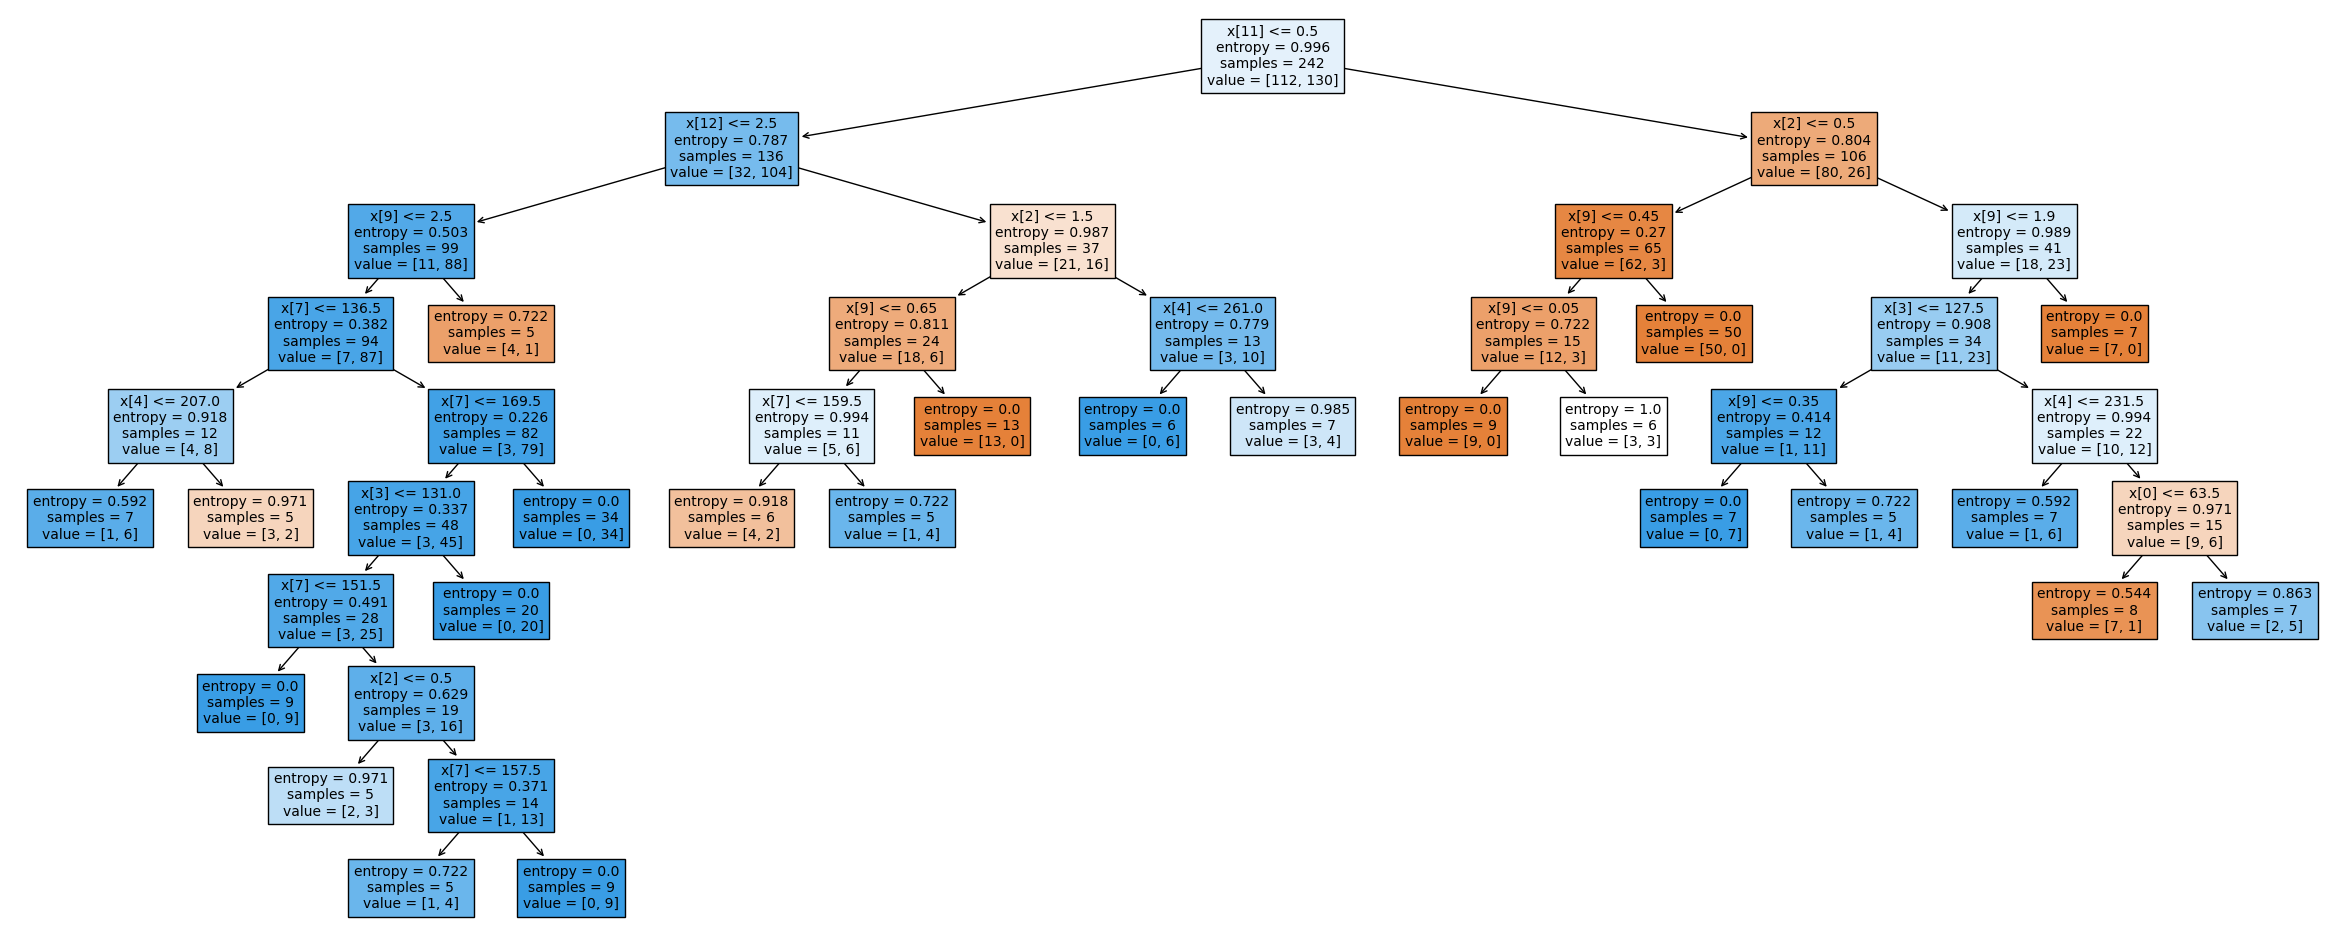

In [13]:
# Replace "..." with your code
# Visualization of the decision tree
# Hint: search for the sklearn methods to export your tree as a jpeg file
plt.figure(figsize=(30, 12))
tree.plot_tree(model, filled=True, fontsize=10)
plt.savefig('decision_tree.jpeg')

### Linking first and second part
We can now check that the Decision Tree Classifier from `sklearn` did the same computations as we did in our first part. Fill in the following code to compute the feature and threshold that generate the best split with the functions implemented in the first part. 

In [15]:
# Replace "..." with your code
# Compute the feature and threshold that generates the best split with the functions implemented in Task 1
split_id, split_threshold, best_score = best_split(x_train, y_train) 
print(f"Feature for the split: {split_id} {data.columns[split_id]}")
print(f"Split threshold: {split_threshold}")
print(f"Best mutual information: {best_score}")

Feature for the split: 11 ca
Split threshold: 0.0
Best mutual information: 0.20161253228052411


/var/folders/yd/mnvy37kj77b_k3wlbxqtk75r0000gn/T/ipykernel_7814/3753945212.py:15: RuntimeWarning: divide by zero encountered in log2
  res =  - prob * np.log2(prob) - (1-prob) * np.log2(1-prob)
/var/folders/yd/mnvy37kj77b_k3wlbxqtk75r0000gn/T/ipykernel_7814/3753945212.py:15: RuntimeWarning: invalid value encountered in double_scalars
  res =  - prob * np.log2(prob) - (1-prob) * np.log2(1-prob)


**Question:** Are the first features/thresholds the same in our method and in the Decision Tree Classifier from `sklearn`? If no, is there a big difference between them?

**Answer:**
Yes, the first features/thresholds are the same in our method and in the Decision Tree Classifier from `sklearn`. There is no big difference between them.

**Question:** How can you recover the *best mutual information* obtained from our code in part one from the tree obtained in the end of the second part?

**Answer:**
We can recover the *best mutual information* obtained from our code in part one from the tree obtained in the end of the second part by looking at the entropy of the leaf nodes.